In [34]:
# import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [2]:
data = pd.read_csv("financial_data.csv")

In [3]:
# clean the data a bit

# drop empty/repeated columns
data.drop(['iprx', 'Name', 'country'], axis=1, inplace=True)

In [4]:
# categorical variables
cat_vars = ['adsh', 'name', 'countryba', 'cityba', 'form', 'period', 'fy', 'fp', 'custom', 
           'abstract', 'datatype', 'uom', 'qtrs', 'instance', 'Ticker', 'S&P Rating', 'uom', 'industry']

for var in cat_vars:
    data[var] = data[var].astype('category')

# continuous variable
cont_vars = [v for v in data.columns.values if v not in cat_vars]

for var in cont_vars:
    data[var] = pd.to_numeric(data[var], errors='coerce')

In [5]:
# we would like to drop the name, adsh, form, qtrs, abstract, period, datatype, instance, fy, fp, Ticker, and uom for predicting.
data.drop(['name', 'adsh', 'form', 'period', 'qtrs', 'abstract', 'datatype', 'instance', 'Ticker', 'fy', 'fp', 'uom'], axis=1, inplace=True)

,Total,Percent
debt/ebitda,210,0.371025
foreign scr,190,0.335689
debt/t asts,180,0.318021
cfo/debt,180,0.318021
debt,180,0.318021


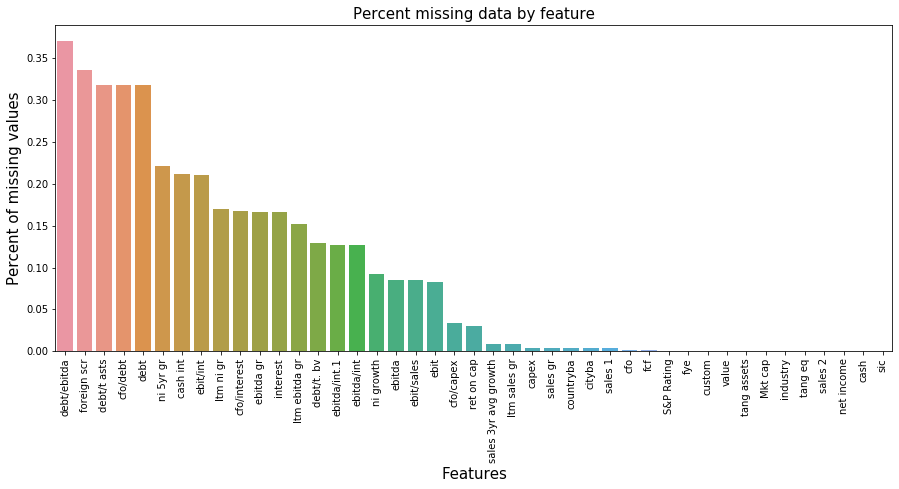

In [6]:
# percentage of missing values of each variable
# reference: https://medium.com/@george.drakos62/handling-missing-values-in-machine-learning-part-1-dda69d4f88ca
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


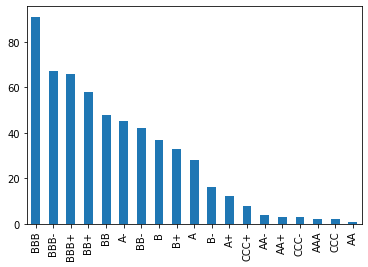

In [7]:
# S&P Ratings
data['S&P Rating'].value_counts().plot("bar")

In [8]:
data['S&P Rating']

0       BB-
1        B+
2      BBB+
3      BBB-
4       BBB
       ... 
561      A-
562     BBB
563     BB-
564      B-
565      B+
Name: S&P Rating, Length: 566, dtype: category
Categories (19, object): [A, A+, A-, AA, ..., BBB-, CCC, CCC+, CCC-]

In [9]:
A_level = ['A', 'A-', 'A+', 'AA', 'AA-', 'AAA', 'AA+']
B_level = ['BBB', 'BBB-', 'BBB+', 'BB+', 'BB', 'BB-', 'B', 'B+', 'B-']

data['S&P Ratings'] = [None]*len(data)

for idx in range(len(data)):
    if data['S&P Rating'][idx] in A_level:
        data['S&P Ratings'][idx] = 'A level'
    elif data['S&P Rating'][idx] in B_level:
        data['S&P Ratings'][idx] = 'B level'
    else:
        data['S&P Ratings'][idx] = 'C level'
data.drop('S&P Rating', axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


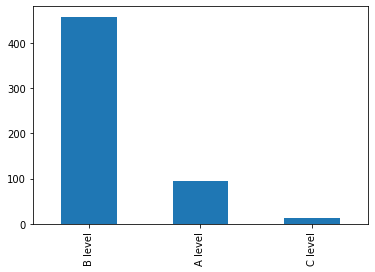

In [10]:
data['S&P Ratings'].value_counts().plot("bar")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


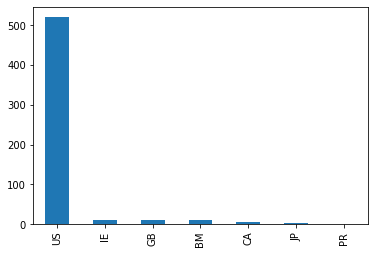

In [11]:
# countryba
data['countryba'].value_counts().plot("bar")

In [12]:
data['countryba'].value_counts()

US    520
IE     12
GB     11
BM     11
CA      5
JP      3
PR      2
Name: countryba, dtype: int64

In [13]:
data[data['countryba'] == 'US']['S&P Ratings'].value_counts()/len(data[data['countryba'] == 'US'])

B level    0.815385
A level    0.161538
C level    0.023077
Name: S&P Ratings, dtype: float64

In [14]:
data[data['countryba'] == 'IE']['S&P Ratings'].value_counts()/len(data[data['countryba'] == 'IE'])

B level    0.833333
A level    0.166667
Name: S&P Ratings, dtype: float64

In [15]:
data[data['countryba'] == 'GB']['S&P Ratings'].value_counts()/len(data[data['countryba'] == 'GB'])

B level    0.909091
A level    0.090909
Name: S&P Ratings, dtype: float64

In [16]:
data[data['countryba'] == 'BM']['S&P Ratings'].value_counts()/len(data[data['countryba'] == 'BM'])

B level    0.636364
A level    0.363636
Name: S&P Ratings, dtype: float64

In [17]:
# get countries from second to last one and replace
bottom_countries = data.groupby('countryba').size().sort_values(ascending = False)[1:].index
bottom_countries = dict.fromkeys(bottom_countries, 'other')
data['countryba'] = data['countryba'].replace(bottom_countries)

In [18]:
data['countryba'].value_counts()

US       520
other     44
Name: countryba, dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


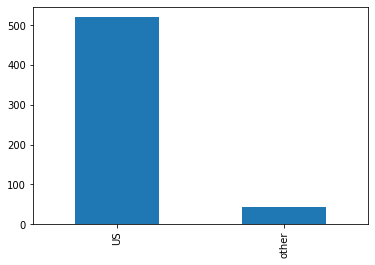

In [19]:
data['countryba'].value_counts().plot("bar")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


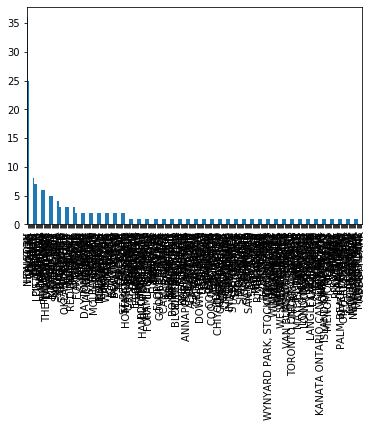

In [20]:
# cityba
data['cityba'].value_counts().plot("bar")

In [21]:
data.drop('cityba', axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


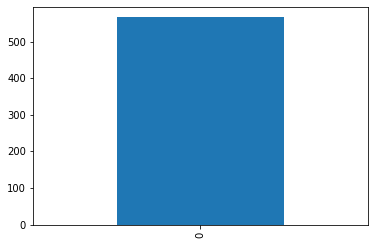

In [22]:
# custom
data['custom'].value_counts().plot("bar")

In [23]:
data.drop('custom', axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


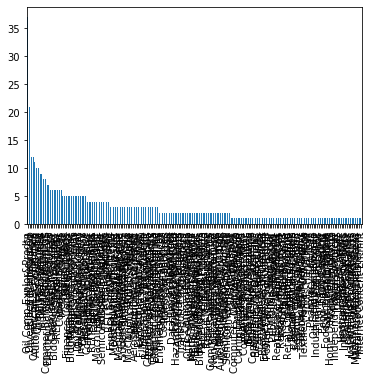

In [24]:
# industry
data['industry'].value_counts().plot("bar")

In [25]:
data['industry'].value_counts().head(20)

Oil Comp-Explor&Prodtn      37
Electric-Integrated         21
Diversified Manufact Op     12
Pipelines                   12
Commercial Serv-Finance     11
Auto/Trk Prts&Equip-Orig    10
Chemicals-Specialty         10
REITS-Diversified            9
Oil-Field Services           9
Multi-line Insurance         8
Medical-Drugs                8
Commer Banks-Southern US     7
Electronic Compo-Semicon     7
Steel-Producers              6
Chemicals-Diversified        6
Bldg-Residential/Commer      6
Medical-HMO                  6
REITS-Office Property        6
Gas-Distribution             6
Computer Services            6
Name: industry, dtype: int64

In [26]:
# get industries from 31 to last one and replace
bottom_industries = data.groupby('industry').size().sort_values(ascending = False)[5:].index
bottom_industries = dict.fromkeys(bottom_industries, 'other')
data['industry'] = data['industry'].replace(bottom_industries)

In [27]:
data['industry'].value_counts()

other                      473
Oil Comp-Explor&Prodtn      37
Electric-Integrated         21
Pipelines                   12
Diversified Manufact Op     12
Commercial Serv-Finance     11
Name: industry, dtype: int64

In [28]:
data.head()

,sic,countryba,fye,value,Mkt cap,sales 1,industry,foreign scr,sales 2,ebitda,...,capex,cfo/debt,debt/ebitda,cfo/interest,ebitda/int.1,ebit/int,ebit/sales,debt/t asts,cfo/capex,S&P Ratings
0,5172.0,US,1231.0,1.500000e+09,2.223985e+09,1.107800e+10,other,0.000000,11723.000,398.000,...,-103.000,0.137540,5.535176,1.442857,1.904306,1.090476,0.019534,0.358445,2.941748,B level
1,2800.0,US,731.0,3.319000e+08,1.023663e+09,4.023910e+08,other,45.995106,333.442,54.297,...,-13.074,NaN,NaN,9.325929,12.600835,7.750259,0.111963,NaN,3.436056,B level
2,3530.0,US,1231.0,1.066911e+10,1.200300e+10,7.938643e+09,Diversified Manufact Op,37.646405,7830.436,1308.685,...,-196.735,0.253136,2.479993,5.657808,9.290481,6.297484,0.116781,0.728381,4.175968,B level
3,3672.0,US,831.0,4.500000e+09,4.818650e+09,2.039922e+10,other,91.367138,19063.121,1170.635,...,-716.485,0.572276,1.875791,9.101228,8.961113,2.971088,0.021520,0.215213,1.753900,B level
4,5531.0,US,831.0,2.097268e+10,1.742988e+10,1.113377e+10,other,NaN,10888.676,2403.120,...,-553.832,0.313740,2.083167,9.935426,17.757351,13.158165,0.191030,0.567882,2.835900,B level


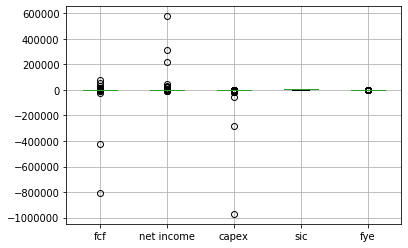

In [29]:
data[['fcf', 'net income', 'capex', 'sic', 'fye']].boxplot()

In [30]:
# test, train, val split the data
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(data.drop('Mkt cap', axis = 1), data['Mkt cap'])
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval)

In [31]:
# Correlation Check
corr = X_train.corr()
corr.style.background_gradient(cmap='coolwarm')

In [32]:
# new correlation matrix
X_train.drop(['sales 2', 'ebitda', 'tang assets', 'cash', 'ltm ebitda gr', 'ebit', 'tang eq', 'value', 'sales gr', 'net income', 'debt', 'cfo/interest', 'ebit/int', 'ebitda/int.1', 'net income', 'cfo', 'capex', 'debt/t. bv'], axis=1, inplace=True)
X_test.drop(['sales 2', 'ebitda', 'tang assets', 'cash', 'ltm ebitda gr', 'ebit', 'tang eq', 'value', 'sales gr', 'net income', 'debt', 'cfo/interest', 'ebit/int', 'ebitda/int.1', 'net income', 'cfo', 'capex', 'debt/t. bv'], axis=1, inplace=True)
X_val.drop(['sales 2', 'ebitda', 'tang assets', 'cash', 'ltm ebitda gr', 'ebit', 'tang eq', 'value', 'sales gr', 'net income', 'debt', 'cfo/interest', 'ebit/int', 'ebitda/int.1', 'net income', 'cfo', 'capex', 'debt/t. bv'], axis=1, inplace=True)
corr = X_train.corr()
corr.style.background_gradient(cmap='coolwarm')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,sic,fye,sales 1,foreign scr,fcf,ltm sales gr,ltm ni gr,sales 3yr avg growth,ebitda gr,ni growth,ni 5yr gr,ebitda/int,cash int,interest,ret on cap,cfo/debt,debt/ebitda,ebit/sales,debt/t asts,cfo/capex
sic,1,-0.0353888,0.0182124,-0.134842,-0.0540592,-0.178705,0.0168873,0.0848943,-0.162192,-0.0226502,0.0970952,-0.0487354,0.0717565,-0.0162878,-0.0391401,0.108982,-0.0858628,0.0463401,-0.00261263,0.0177627
fye,-0.0353888,1,-0.144157,0.0147263,0.129942,0.0192258,-0.155791,-0.0011596,0.0354041,0.0360294,0.0251401,0.0173493,-0.0843493,-0.0178264,-0.0503291,0.0294249,-0.00812329,0.0911335,-0.010243,0.059564
sales 1,0.0182124,-0.144157,1,0.0310633,-0.755226,-0.0434675,0.00788708,-0.035842,-0.0200894,-0.0129933,-0.0524159,-0.00920165,0.0327035,0.587771,0.00274606,-0.0157993,-0.060385,0.0490608,-0.0801584,-0.0474285
foreign scr,-0.134842,0.0147263,0.0310633,1,0.0356328,0.0352954,0.0965001,-0.0534629,0.120746,0.15534,-0.171654,0.000135784,0.00307694,0.0878487,-0.00947752,0.043243,-0.0994561,-0.15612,0.0221414,-0.135052
fcf,-0.0540592,0.129942,-0.755226,0.0356328,1,0.0148173,0.00305247,0.0018174,0.00230628,-0.000369693,-0.0284083,0.00493992,0.0623901,0.497115,0.0128813,0.00465263,-0.0150753,-0.101726,0.0217323,0.0411883
ltm sales gr,-0.178705,0.0192258,-0.0434675,0.0352954,0.0148173,1,-0.0233362,0.519902,0.329669,-0.0955634,0.0709799,0.062454,-0.0175518,-0.0988338,0.0309101,-0.0240068,-0.103186,-0.0416721,-0.0412954,-0.0650896
ltm ni gr,0.0168873,-0.155791,0.00788708,0.0965001,0.00305247,-0.0233362,1,-0.0321646,0.00513141,-0.0129682,-0.140846,0.0030934,-0.0191252,-0.00743278,-0.0708629,-0.00887769,0.00202433,-0.0474691,-0.0177443,-0.0265885
sales 3yr avg growth,0.0848943,-0.0011596,-0.035842,-0.0534629,0.0018174,0.519902,-0.0321646,1,0.257238,-0.014208,0.369224,0.0517388,0.00612457,-0.0999211,-0.0246725,-0.0121864,0.0015372,0.0268088,0.0128311,0.0792718
ebitda gr,-0.162192,0.0354041,-0.0200894,0.120746,0.00230628,0.329669,0.00513141,0.257238,1,-0.00702168,0.00722283,0.0217454,0.0276434,-0.0427515,0.0399253,-0.00874757,-0.0658833,0.319548,-0.0854364,0.0151081
ni growth,-0.0226502,0.0360294,-0.0129933,0.15534,-0.000369693,-0.0955634,-0.0129682,-0.014208,-0.00702168,1,-0.00566159,-0.00297959,-0.0151547,-0.0014832,0.136479,-0.011838,-0.0360147,-0.0435855,-0.0907083,-0.026567


In [35]:
X_train_a = pd.get_dummies(X_train)
knn = KNNImputer()
X_train_cleaned = knn.fit_transform(X_train_a)

In [36]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
clf.fit(X_train_cleaned, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [37]:
for feature in zip(list(X_train_a.columns), clf.feature_importances_):
    print(feature)

('sic', 0.002149460263996984)
('fye', 0.001388342989166728)
('sales 1', 0.5044103233587092)
('foreign scr', 0.0017647677686973976)
('fcf', 0.4105412657961042)
('ltm sales gr', 0.012902840791146652)
('ltm ni gr', 0.00592243521244074)
('sales 3yr avg growth', 0.0019409646383388088)
('ebitda gr', 0.0019951414985283)
('ni growth', 0.004299203349642821)
('ni 5yr gr', 0.0014745423521429777)
('ebitda/int', 0.00672327267674878)
('cash int', 0.007735919722757981)
('interest', 0.012714694638027537)
('ret on cap', 0.0020230981249071776)
('cfo/debt', 0.004010651938622167)
('debt/ebitda', 0.002884990350752732)
('ebit/sales', 0.005480270591911869)
('debt/t asts', 0.0036690646726214734)
('cfo/capex', 0.0028735057103146705)
('countryba_US', 0.000430108996865892)
('countryba_other', 0.0002206526215928052)
('industry_Commercial Serv-Finance', 5.653373753416041e-06)
('industry_Diversified Manufact Op', 2.7198288409971306e-05)
('industry_Electric-Integrated', 2.3063928213706576e-05)
('industry_Oil Comp-Ex

In [38]:
X_train.columns

Index(['sic', 'countryba', 'fye', 'sales 1', 'industry', 'foreign scr', 'fcf',
       'ltm sales gr', 'ltm ni gr', 'sales 3yr avg growth', 'ebitda gr',
       'ni growth', 'ni 5yr gr', 'ebitda/int', 'cash int', 'interest',
       'ret on cap', 'cfo/debt', 'debt/ebitda', 'ebit/sales', 'debt/t asts',
       'cfo/capex', 'S&P Ratings'],
      dtype='object')

In [39]:
zip(list(X_train_a.columns), clf.feature_importances_)

In [40]:
rf_df = pd.DataFrame()
rf_df['feature'] = list(X_train_a.columns)
rf_df['log_feature_importance'] = list(np.log(clf.feature_importances_))

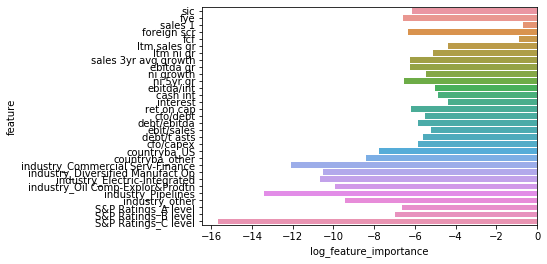

In [41]:
ax = sns.barplot(x='log_feature_importance', y = 'feature', data=rf_df)

There are several variables with very little importance. We delete these variables.

In [42]:
X_train.drop(['S&P Ratings', 'debt/t asts', 'countryba'], axis=1, inplace=True)
X_test.drop(['S&P Ratings', 'debt/t asts', 'countryba'], axis=1, inplace=True)
X_val.drop(['S&P Ratings', 'debt/t asts', 'countryba'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
# # categorical variables
# X_train['countryba'].fillna('US', inplace=True)
# X_test['countryba'].fillna('US', inplace=True)
# X_val['countryba'].fillna('US', inplace=True)

In [44]:
cat_vars = ['industry']
cont_vars = [v for v in X_train.columns.values if v not in cat_vars and v != 'Mkt Cap']

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.compose import make_column_transformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [46]:
preprocess_scale = make_column_transformer(
    (make_pipeline(KNNImputer(), StandardScaler()), cont_vars),
    (OneHotEncoder(handle_unknown = 'ignore'), cat_vars))

Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
linear_scale = make_pipeline(preprocess_scale, LinearRegression())
linear_scale_cross_validate = cross_validate(linear_scale, X_train, y_train, cv=5)

In [48]:
linear_scale_cross_validate

{'fit_time': array([0.03716779, 0.01237607, 0.01273704, 0.01311684, 0.01284695]),
 'score_time': array([0.01056933, 0.00834918, 0.00741887, 0.00762916, 0.00745106]),
 'test_score': array([ 4.24321243e-01, -3.85752499e+00,  4.55071721e-01, -2.39697135e+00,
        -3.80617504e+03])}

In [49]:
np.mean(linear_scale_cross_validate['test_score'])

-762.3100277208355

In [50]:
from sklearn.linear_model import LinearRegression
linear_scale = make_pipeline(preprocess_scale, LinearRegression())
linear_scale_cross_validate = cross_validate(linear_scale, X_train, y_train, 
                                             scoring=('r2', 'neg_root_mean_squared_error'), cv=5)

In [51]:
print(np.mean(linear_scale_cross_validate['test_neg_root_mean_squared_error']))
print(np.mean(linear_scale_cross_validate['test_r2']))

-569965653723.8738
-762.3100277208355


Elastic Net

In [52]:
from sklearn.linear_model import ElasticNet
en_scale = make_pipeline(preprocess_scale, ElasticNet())
en_scale_cross_validate = cross_validate(en_scale, X_train, y_train,cv=5, scoring=('r2', 'neg_root_mean_squared_error'))

In [53]:
print(np.mean(en_scale_cross_validate['test_neg_root_mean_squared_error']))
print(np.mean(en_scale_cross_validate['test_r2']))

-151865104870.3076
-0.2886550400775735


Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf_scale = make_pipeline(preprocess_scale, RandomForestRegressor())
rf_scale_cross_validate = cross_validate(rf_scale, X_train, y_train, cv=5, scoring=('r2', 'neg_root_mean_squared_error'))

In [55]:
rf_scale_cross_validate

{'fit_time': array([0.26949096, 0.264045  , 0.27677512, 0.25954509, 0.27072191]),
 'score_time': array([0.01210499, 0.0128572 , 0.011868  , 0.01270795, 0.01184416]),
 'test_r2': array([0.43843374, 0.870006  , 0.83637386, 0.28187745, 0.85992629]),
 'test_neg_root_mean_squared_error': array([-9.67140823e+10, -1.66697166e+10, -1.77104504e+10, -2.74293741e+11,
        -1.22593624e+10])}

In [56]:
print(np.mean(rf_scale_cross_validate['test_neg_root_mean_squared_error']))
print(np.mean(rf_scale_cross_validate['test_r2']))

-83529470536.72768
0.6573234671967854


Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
gb_scale = make_pipeline(preprocess_scale, GradientBoostingRegressor())
gb_scale_cross_validate = cross_validate(gb_scale, X_train, y_train, cv=5, scoring=('r2', 'neg_root_mean_squared_error'))

In [71]:
print(np.mean(gb_scale_cross_validate['test_neg_root_mean_squared_error']))
print(np.mean(gb_scale_cross_validate['test_r2']))

-82497949902.08353
0.6572451632752475


LightGMB

In [74]:
from lightgbm.sklearn import LGBMRegressor
lgmb_scale = make_pipeline(preprocess_scale, LGBMRegressor())
lgmb_scale_cross_validate = cross_validate(lgmb_scale, X_train, y_train, cv=5, scoring=('r2', 'neg_root_mean_squared_error'))

In [75]:
print(np.mean(lgmb_scale_cross_validate['test_neg_root_mean_squared_error']))
print(np.mean(lgmb_scale_cross_validate['test_r2']))

-111069260114.70427
-0.12518069312821964


KNN

In [76]:
from sklearn.neighbors import KNeighborsRegressor

# with scaling
knn_scale = make_pipeline(preprocess_scale, KNeighborsRegressor())
knn_scale_cross_validate = cross_validate(knn_scale, X_train, y_train, cv=5, scoring=('r2', 'neg_root_mean_squared_error'))

In [77]:
print(np.mean(knn_scale_cross_validate['test_neg_root_mean_squared_error']))
print(np.mean(knn_scale_cross_validate['test_r2']))

-100471386642.05682
0.37107190268767265
